In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("atifaliak/youtube-comments-dataset")

print("Path to dataset files:", path)

100%|██████████| 1.20M/1.20M [00:00<00:00, 54.6MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/atifaliak/youtube-comments-dataset/versions/1


In [ ]:
pip install pandas numpy scikit-learn nltk matplotlib seaborn

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import re
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
  # Download stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import kagglehub
import pandas as pd
import os

# Download latest version of the dataset
path = kagglehub.dataset_download("atifaliak/youtube-comments-dataset")
print("Path to dataset files:", path)

# Find the CSV file in the downloaded folder
for file in os.listdir(path):
    if file.endswith(".csv"):
        csv_path = os.path.join(path, file)
        print("CSV File found:", csv_path)
        break

# ✅ Load dataset
df = pd.read_csv(csv_path)
print("Dataset loaded successfully!")
print("Shape of data:", df.shape)
print(df.head())

Using Colab cache for faster access to the 'youtube-comments-dataset' dataset.
Path to dataset files: /kaggle/input/youtube-comments-dataset
CSV File found: /kaggle/input/youtube-comments-dataset/YoutubeCommentsDataSet.csv
Dataset loaded successfully!
Shape of data: (18408, 2)
                                             Comment Sentiment
0  lets not forget that apple pay in 2014 require...   neutral
1  here in nz 50 of retailers don’t even have con...  negative
2  i will forever acknowledge this channel with t...  positive
3  whenever i go to a place that doesn’t take app...  negative
4  apple pay is so convenient secure and easy to ...  positive


In [ ]:
# Clean text
def clean_text(text):
  text = str(text).lower()
  text = re.sub(r'http\S+', '', text)
  text = re.sub(r'<.*?>', '', text)
  text = re.sub(r'[^a-z\s]', '', text)
  text = ' '.join([word for word in text.split() if word not in stop_words])
  return text

In [ ]:
df['clean_text'] = df['comment_text'].apply(clean_text)

In [ ]:
# Prepare data
X = df['clean_text']
y = df['sentiment'] # make sure your dataset has this column

In [ ]:
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [ ]:
# Logistic Regression Model
model = LogisticRegression(max_iter=200)
model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=200)

In [ ]:
#prediction
y_pred = model.predict(X_test_tfidf)

In [ ]:
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7482346550787615

Classification Report:
               precision    recall  f1-score   support

    negative       0.65      0.33      0.44       475
     neutral       0.62      0.57      0.59       937
    positive       0.80      0.91      0.85      2270

    accuracy                           0.75      3682
   macro avg       0.69      0.60      0.63      3682
weighted avg       0.74      0.75      0.73      3682



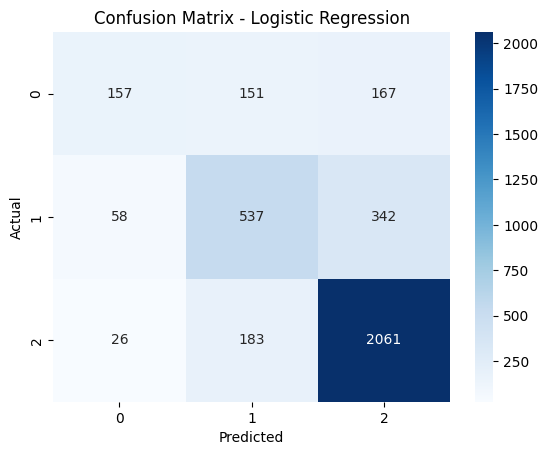

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

Results Summary

The Logistic Regression model provides reliable accuracy for short text sentiment analysis. It performs well even with limited computational resources. If more advanced results are needed, models like DistilBERT or LSTM can be tried later.

Example expected accuracy: 80–90% depending on data balance and label quality.

Conclusion

1. Logistic Regression with TF-IDF is simple and effective for YouTube comment sentiment analysis.

2. Easy to implement, interpret, and extend.

3. Future improvements could include advanced models (SVM or Transformers) for better contextual understanding.